### AI Bootcamp - June 2024 Cohort - Example Starter File for Modeling
Documentation and Context: See the project's ReadMe.md file for documentation on the column names and purposes.

### What's in this workbook?
This is a starter Jupyter Notebook for the project team to use when building out various machine learning models. Each team member will create a copy of this notebook for their work. 

## Libraries Imported
* Pandas
* Numpy
* Matplotlib
* sklearn
    * StandardScaler
    * PCA
    * LabelEncoder

In [20]:
# Do imports
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

### Read In Data to Dataframe
There are two sets of data you can import:
* feature_eng_encoded_airlines.csv - Has additional features to improve accuracy
* simple_encoded_airlines.csv - No additional features

Both CSVs are built from the data cleaning, analysis, and processing the team did together. The processing files are in the **data_processing** folder. The data files are in the **data** folder.

In [21]:
# Create DataFrame using the feature engineering notebook (recommended)
encoded_df = pd.read_csv('./data/feature_eng_encoded_airlines.csv')
encoded_df.head()

# Create DataFrame using the simple encoding notebook (not recommended, but useful for testing if needed)
# simple_encoded_df = pd.read_csv('./data/simple_encoded_airlines.csv')
# simple_encoded_df.head()

,Flight,DayOfWeek,Delay,AirportFromID,AirportToID,AirlineID,Flight_Duration_Hours,Departure_Time_Hour,Departure_Group,Weekend,Arrival_Time_Hour,Arrival_Group
0,269,3,1,1,103,2824,3.416667,0.250000,3,0,3.666667,3
1,1558,3,1,2,109,1409,3.700000,0.250000,3,0,3.950000,3
2,2400,3,1,3,72,5506,2.750000,0.333333,3,0,3.083333,3
3,2466,3,1,1,72,5506,3.250000,0.333333,3,0,3.583333,3
4,108,3,0,4,22,5012,3.366667,0.500000,3,0,3.866667,3


In [22]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Flight                 539383 non-null  int64  
 1   DayOfWeek              539383 non-null  int64  
 2   Delay                  539383 non-null  int64  
 3   AirportFromID          539383 non-null  int64  
 4   AirportToID            539383 non-null  int64  
 5   AirlineID              539383 non-null  int64  
 6   Flight_Duration_Hours  539383 non-null  float64
 7   Departure_Time_Hour    539383 non-null  float64
 8   Departure_Group        539383 non-null  int64  
 9   Weekend                539383 non-null  int64  
 10  Arrival_Time_Hour      539383 non-null  float64
 11  Arrival_Group          539383 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 49.4 MB


### Correlation

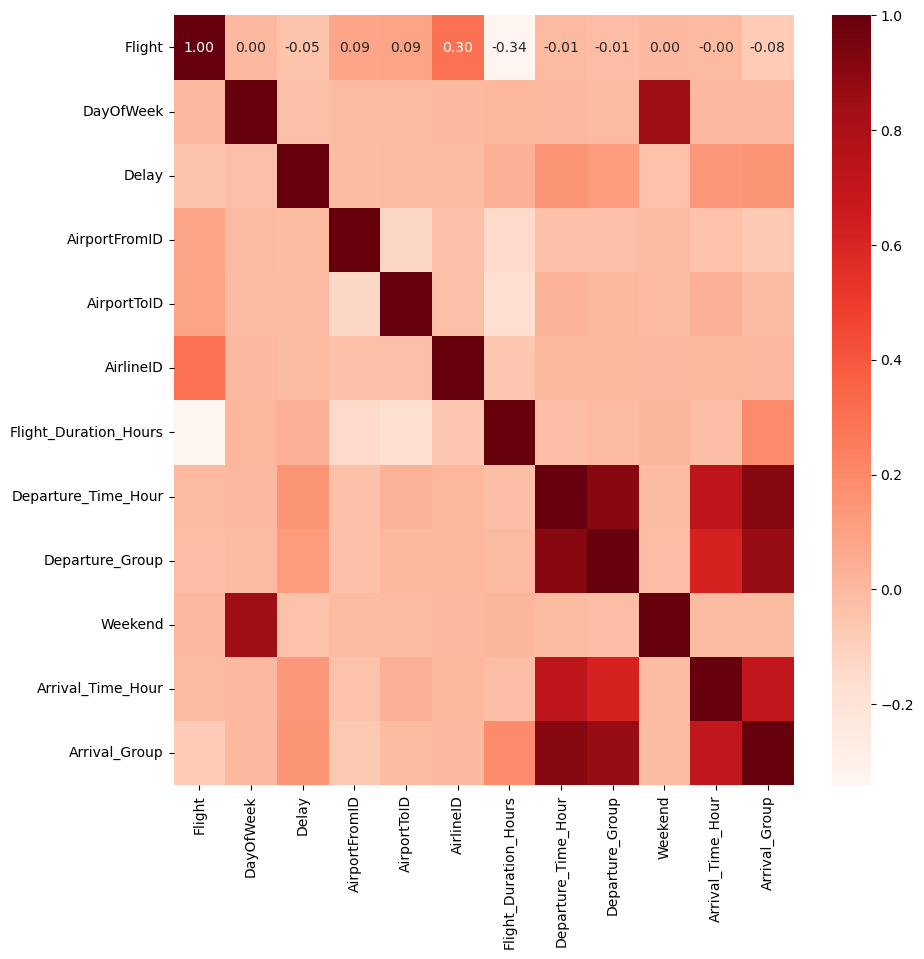

In [23]:
# Create a correlation matrix to see how features are related
plt.figure(figsize=(10,10))
cor = encoded_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt='.2f')
plt.show()

### Prepare the data for modeling

In [24]:
# Define X for training and testing and drop the Delay column since it's our target
X = encoded_df.copy()
X.drop('Delay', axis=1, inplace=True)
X.head()

,Flight,DayOfWeek,AirportFromID,AirportToID,AirlineID,Flight_Duration_Hours,Departure_Time_Hour,Departure_Group,Weekend,Arrival_Time_Hour,Arrival_Group
0,269,3,1,103,2824,3.416667,0.250000,3,0,3.666667,3
1,1558,3,2,109,1409,3.700000,0.250000,3,0,3.950000,3
2,2400,3,3,72,5506,2.750000,0.333333,3,0,3.083333,3
3,2466,3,1,72,5506,3.250000,0.333333,3,0,3.583333,3
4,108,3,4,22,5012,3.366667,0.500000,3,0,3.866667,3


In [25]:
# Define the Delay column as our target
y = encoded_df['Delay']

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True)

### Identify the most impactful features
During testing, we found that some features were less important than others

[1.15246853e+03 3.70486797e+02 5.94373880e+01 8.04738613e+00
 2.37551131e+01 8.85711795e+02 1.24923930e+04 8.06338514e+03
 6.46635625e+02 1.03828772e+04 1.22813224e+04]
Original shape: (539383, 11)
Selected shape: (539383, 5)


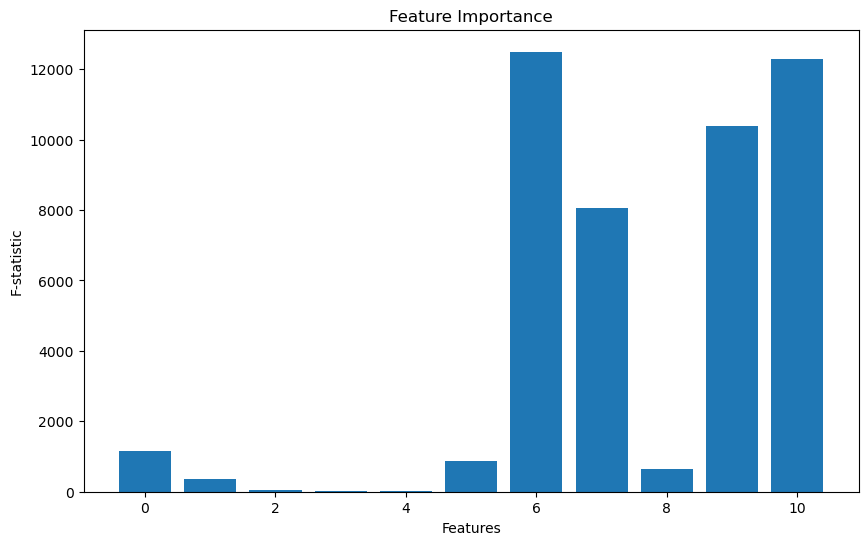

In [27]:
# Use SelectKBest to identify the most important features affecting the target variable 'Delay'
selector = SelectKBest(f_regression, k=5)
X_selected = selector.fit_transform(X, y)

print(selector.scores_)
print("Original shape:", X.shape)
print("Selected shape:", X_selected.shape)

plt.figure(figsize=(10, 6))
plt.bar(range(len(selector.scores_)), selector.scores_)
plt.xlabel('Features')
plt.ylabel('F-statistic')
plt.title('Feature Importance')
plt.show()

### Scale the Data
KMeans, KNN, Logistic Regression, SVC, Gradient Boosting (including XGBoost), and Adaptive Boosting benefit from scaled data. Decisision Trees and Random Forests do not. Research your model to determine whether to use the StandardScaler or MinMaxScaler. Both are defined below. 

#### Scale with MinMaxScaler

In [28]:
# Scale the data with MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled)
print(X_test_scaled)

[[0.10586278 0.16666667 0.05479452 ... 0.         0.69631689 0.33333333]
 [0.03609831 0.5        0.43835616 ... 0.         0.69840167 0.33333333]
 [0.85368664 0.5        0.29794521 ... 0.         0.8304378  0.66666667]
 ...
 [0.84395801 0.33333333 0.14041096 ... 0.         0.36136206 0.        ]
 [0.11994368 0.33333333 0.02054795 ... 0.         0.76372481 0.66666667]
 [0.37775218 0.33333333 0.07876712 ... 0.         0.40236275 0.        ]]
[[0.82898105 1.         0.43493151 ... 1.         0.67129951 0.33333333]
 [0.03955453 0.16666667 0.02054795 ... 0.         0.61709521 0.33333333]
 [0.22247824 1.         0.45547945 ... 1.         0.38220987 0.        ]
 ...
 [0.03673835 0.66666667 0.22260274 ... 1.         0.69701181 0.33333333]
 [0.21658986 0.83333333 0.78082192 ... 1.         0.74635163 0.66666667]
 [0.4733743  0.         0.62671233 ... 0.         0.00694927 1.        ]]


#### Scale with StandardScaler

In [29]:
# Scaling the data by using StandardScaler()
# scaler = StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# print(X_train_scaled)
# print(X_test_scaled)

### Logistic Regression

In [30]:
# Create a LogisticRegression function
logistic_regression_model = LogisticRegression(max_iter=1000, random_state=42)

In [31]:
# Fit the model for Logistic Regression
logistic_regression_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [32]:
# Score the model
log_train_score = logistic_regression_model.score(X_train_scaled, y_train)
log_test_score = logistic_regression_model.score(X_test_scaled, y_test)


print(f'Logistic Regression training score: {log_train_score}')
print(f'Logistic Regression testing score: {log_test_score}')
      

Logistic Regression training score: 0.5724667953734763
Logistic Regression testing score: 0.5731871913145365


In [33]:
# Generate predictions from the Logistic Regression model we just fit
log_predictions = logistic_regression_model.predict(X_train_scaled)

# Convert those predictions (and actual values) to a DataFrame
log_results_df = pd.DataFrame({'Prediction': log_predictions, 'Actual': y_train})

In [34]:
# Apply the fitted model to the test dataset
log_testing_predictions = logistic_regression_model.predict(X_test_scaled)

# Save both the test predictions and actual test values to a DataFrame
log_results_df = pd.DataFrame({
    "Logistic Regression testing predictions": log_testing_predictions, 
    "Logistic Regression actual targets": y_test})

In [35]:
# Display the results DataFrame for Logistic Regression prediction accuracy
log_results_df.head()

,Logistic Regression testing predictions,Logistic Regression actual targets
442150,0,1
229730,0,1
69994,0,1
414293,1,0
171704,1,1


In [36]:
# Calculate the model's accuracy on the test dataset
log_accuracy_score = accuracy_score(y_test, log_testing_predictions)
print(f"Logistic Regression model accuracy: {log_accuracy_score}")

Logistic Regression model accuracy: 0.5731871913145365


In [37]:
# Save the results to a file for tracking

from datetime import datetime

# Open the file in append mode
with open('./tests/logistic_regression_score.txt', 'a') as file:
    current_datetime = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    file.write(f'''{current_datetime}
    Logistic regression accuracy: {log_accuracy_score}
    Train score: {log_train_score}
    Test score: {log_test_score}
    Max iterations: {logistic_regression_model.max_iter}
    Random state: {logistic_regression_model.random_state}
    Comment (optional):\n\n''')